In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
# !curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
import matplotlib.pyplot as plt
# conda_installer.install()
conda_installer.install()
# !/root/miniconda/bin/conda info -e
import rdkit

from deepchem.feat.graph_features import atom_features as get_atom_features

2023-01-16 10:15:29.016750: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-16 10:15:29.016786: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
add /home/ali/miniconda/lib/python3.8/site-packages to PYTHONPATH
all packages are already installed


In [2]:
df = pd.read_csv('../Datasets/Mobley/info.csv')
df = df.dropna()
df = df[df['Dataset Name'] == 'cd-set1']

In [3]:
training_cols = [col for col in df.columns if (col[:3] == 'gb_' and not col.__contains__('Etot') and not col.__contains__('Ex_') and not col.__contains__('delta')) or (col.__contains__('VDWAALS'))]
# training_cols = ['gb_Ex_difference']

In [4]:
df[['EX _H_(kcal/mol)', 'gb_Ex_difference']]

,EX _H_(kcal/mol),gb_Ex_difference
0,-2.17,0.1750
1,-4.19,-7.0724
2,-5.46,-9.9474
3,-2.74,-7.8186
4,-2.99,-11.5617
5,-2.53,-3.3226
6,-3.40,-8.4633
7,-4.89,-10.9281
8,-2.57,-0.2151
9,-2.68,-1.4122


In [5]:
df

,ID,dataset group name,Dataset Name,Host,Guest,Ex _G_(kcal/mol),Ex _G_SEM,EX _H_(kcal/mol),EX _H_SEM,pb_guest_Etot,...,gb_host_1-4EEL,gb_host_EELEC,gb_host_EGB,gb_host_ESURF,gb_delta_H,pb_delta_H,EX _delta_H_(kcal/mol),gb_Ex_difference,SQR_gbnsr6_Ex_difference,pb_Ex_difference
0,1,Mobley benchmarkset,cd-set1,acd,guest-1,-1.575,0.019,-2.17,0.05,-47.8832,...,423.5761,-428.9520,-96.4471,5.1691,-1.9950,-0.8408,-2.17,0.1750,0.030625,1.3292
1,2,Mobley benchmarkset,cd-set1,acd,guest-2,-3.533,0.004,-4.19,0.02,-52.0758,...,412.6663,-397.9784,-106.4154,5.0726,-11.2624,-8.4809,-4.19,-7.0724,50.018842,-4.2909
2,3,Mobley benchmarkset,cd-set1,acd,guest-3,-4.606,0.007,-5.46,0.03,-51.5323,...,426.2925,-429.3068,-95.2452,5.1352,-15.4074,-13.8234,-5.46,-9.9474,98.950767,-8.3634
3,4,Mobley benchmarkset,cd-set1,acd,guest-4,-2.130,0.016,-2.74,0.02,2.3898,...,420.0687,-416.5215,-97.4461,5.0849,-10.5586,-11.3319,-2.74,-7.8186,61.130506,-8.5919
4,5,Mobley benchmarkset,cd-set1,acd,guest-5,-2.510,0.060,-2.99,0.23,-3.2280,...,425.7315,-435.9689,-91.2312,5.0881,-14.5517,-14.0485,-2.99,-11.5617,133.672907,-11.0585
5,6,Mobley benchmarkset,cd-set1,acd,guest-6,-1.506,0.036,-2.53,0.12,-56.4635,...,422.4095,-421.3737,-99.7968,5.1792,-5.8526,-7.6596,-2.53,-3.3226,11.039671,-5.1296
6,7,Mobley benchmarkset,cd-set1,acd,guest-7,-3.380,0.005,-3.40,0.02,-71.4929,...,422.3651,-398.7469,-106.3300,5.0312,-11.8633,-11.0241,-3.40,-8.4633,71.627447,-7.6241
7,8,Mobley benchmarkset,cd-set1,acd,guest-8,-4.622,0.017,-4.89,0.03,-70.0470,...,418.4633,-421.1437,-95.0137,5.1211,-15.8181,-14.5525,-4.89,-10.9281,119.423370,-9.6625
8,9,Mobley benchmarkset,cd-set1,acd,guest-9,-1.685,0.018,-2.57,0.06,-40.7839,...,426.4985,-421.9704,-93.9633,5.2166,-2.7851,-1.3499,-2.57,-0.2151,0.046268,1.2201
9,10,Mobley benchmarkset,cd-set1,acd,guest-10,-1.764,0.020,-2.68,0.07,15.6104,...,421.9775,-406.1717,-103.9776,5.0478,-4.0922,-1.9281,-2.68,-1.4122,1.994309,0.7519


In [6]:
PDBs = {}
from os import listdir
from os.path import isfile, join
mypath = '../Datasets/Mobley/cd-set1/pdb/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
host_name = [x for x in onlyfiles if x.__contains__('host')][0]
host_mol = rdkit.Chem.rdmolfiles.MolFromPDBFile(mypath + '/' + host_name)
onlyfiles.remove(host_name)
for f in onlyfiles[:2]:
    guest_mol = rdkit.Chem.rdmolfiles.MolFromPDBFile(mypath + '/' + f)
    PDBs.update({f.split('.')[0] : rdkit.Chem.CombineMols(host_mol,guest_mol)})

In [7]:
def featurize(molecule):
    def convertBONDtoOneHotVector(bond_type):
        BOND_DICT = {dir(rdkit.Chem.rdchem.BondType)[i]: i for i in range(22)}
        one_hot = np.zeros(22)
        one_hot[BOND_DICT[str(bond_type)]] = 1
        return one_hot
    
    atom_features = []
    adjacency_list = []
    for atom in molecule.GetAtoms():
        new_feature = get_atom_features(atom).tolist()
        position = molecule.GetConformer().GetAtomPosition(atom.GetIdx())
        new_feature += [atom.GetMass(), atom.GetAtomicNum()]
        new_feature += [position.x, position.y, position.z]
        atom_features.append(new_feature)
    atom_features = np.array(atom_features)
    for atom in molecule.GetAtoms():
        atom_bonds = []
        for neighbor in atom.GetNeighbors()[:2]:
            bond_type = molecule.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx()).GetBondType()
            neighbor_idx = neighbor.GetIdx()
            atom_bonds.append([neighbor_idx, convertBONDtoOneHotVector(bond_type)])
        adjacency_list.append(atom_bonds)
    return [atom_features, adjacency_list]

In [21]:
smiles = ["C", "CCC"]
import deepchem as dc
featurizer=dc.feat.ConvMolFeaturizer(per_atom_fragmentation=False)
f = featurizer.featurize(smiles)

In [44]:
s_m = rdkit.Chem.MolFromSmiles("CCC")

In [39]:
k = f[1]

In [40]:
k.deg_adj_lists

[array([], shape=(0, 0), dtype=int32),
 array([[2],
        [2]], dtype=int32),
 array([[0, 1]], dtype=int32),
 array([], shape=(0, 3), dtype=int32),
 array([], shape=(0, 4), dtype=int32),
 array([], shape=(0, 5), dtype=int32),
 array([], shape=(0, 6), dtype=int32),
 array([], shape=(0, 7), dtype=int32),
 array([], shape=(0, 8), dtype=int32),
 array([], shape=(0, 9), dtype=int32),
 array([], shape=(0, 10), dtype=int32)]

In [23]:
x = ConvMol.agglomerate_mols(f)

In [27]:
n_samples = np.array(2)
inputs = [
    x.get_atom_features(), x.deg_slice,
    np.array(x.membership), n_samples
]
for i in range(1, len(x.get_deg_adjacency_lists())):
    inputs.append(x.get_deg_adjacency_lists()[i])

In [33]:
def sum_neigh(atoms, deg_adj_lists):
    """Store the summed atoms by degree"""
    deg_summed = 4 * [None]

    # Tensorflow correctly processes empty lists when using concat
    for deg in range(1, 4 + 1):
        print("deg ", deg)
        gathered_atoms = tf.gather(atoms, deg_adj_lists[deg - 1])
        print("gathered atoms ", gathered_atoms)
        # Sum along neighbors as well as self, and store
        summed_atoms = tf.reduce_sum(gathered_atoms, 1)
        deg_summed[deg - 1] = summed_atoms

    return deg_summed

In [36]:
x.get_deg_adjacency_lists()

[array([], shape=(1, 0), dtype=int32),
 array([[3],
        [3]], dtype=int32),
 array([[1, 2]], dtype=int32),
 array([], shape=(0, 3), dtype=int32),
 array([], shape=(0, 4), dtype=int32),
 array([], shape=(0, 5), dtype=int32),
 array([], shape=(0, 6), dtype=int32),
 array([], shape=(0, 7), dtype=int32),
 array([], shape=(0, 8), dtype=int32),
 array([], shape=(0, 9), dtype=int32),
 array([], shape=(0, 10), dtype=int32)]

In [34]:
s = sum_neigh(inputs[0], inputs[3:])

deg  1
gathered atoms  tf.Tensor(
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0.], shape=(75,), dtype=float64)


2023-01-16 13:44:07.116429: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at reduction_ops_common.h:149 : INVALID_ARGUMENT: Invalid reduction dimension (1 for input with 1 dimension(s)


InvalidArgumentError: Invalid reduction dimension (1 for input with 1 dimension(s) [Op:Sum]

In [ ]:
s

In [8]:
X = []
y = []
info = []
for pdb in list(PDBs.keys()):
    X.append(featurize(PDBs[pdb]))
    info.append(df[df['Guest'] == pdb.replace('-s', '-')][training_cols].to_numpy()[0])
    y.append(df[df['Guest'] == pdb.replace('-s', '-')]['EX _H_(kcal/mol)'].abs().to_numpy()[0])
info = np.array(info)

In [9]:
%cd ..

/home/ali/GBNN


In [10]:
%cd PGGCN

/home/ali/GBNN/PGGCN


In [11]:
training_cols

['pb_guest_VDWAALS',
 'pb_host_VDWAALS',
 'pb_complex_VDWAALS',
 'gb_Complex_1-4EEL',
 'gb_Complex_EELEC',
 'gb_Complex_EGB',
 'gb_Complex_ESURF',
 'gb_guest_1-4EEL',
 'gb_guest_EELEC',
 'gb_guest_EGB',
 'gb_guest_ESURF',
 'gb_host_1-4EEL',
 'gb_host_EELEC',
 'gb_host_EGB',
 'gb_host_ESURF']

In [20]:
import layers
import importlib
importlib.reload(layers)


class PGGCNModel(tf.keras.Model):
    def __init__(self, num_atom_features = 80, r_out_channel = 40, c_out_channel = 1024):
        super().__init__()
        self.ruleGraphConvLayer = layers.RuleGraphConvLayer(r_out_channel, num_atom_features)
        self.ruleGraphConvLayer.combination_rules = []
        self.conv = layers.ConvLayer(c_out_channel)
        self.dense1 = tf.keras.layers.Dense(300, activation='sigmoid')
#         self.dense2 = tf.keras.layers.Dense(450, activation='sigmoid')
#         self.dense3 = tf.keras.layers.Dense(250, activation='relu')
#         self.dense4 = tf.keras.layers.Dense(150, activation='relu')
#         self.dense5 = tf.keras.layers.Dense(50, activation='relu')
        self.dense6 = tf.keras.layers.Dense(1, activation='relu')
        self.dense7 = tf.keras.layers.Dense(1,
                 kernel_initializer=tf.keras.initializers.Constant([.2, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1]),
                 bias_initializer=tf.keras.initializers.Zeros(), activation=tf.keras.activations.relu)

    def set_physics_info(self, info):
        self.physics_info = info.reshape([-1, 15])

    def addRule(self, rule, start_index, end_index = None):
        self.ruleGraphConvLayer.addRule(rule, start_index, end_index)
    
    def set_input(self, all_inputs):
        self.all_inputs = all_inputs
        
    def set_adjacency_list(self, a_l):
        self.a_l = a_l
    
    def set_input_shapes(self, i_s):
        self.i_s = i_s

    def call(self, inputs):
        x_a = []
        for i in range(len(self.i_s)):
            x_a.append(inputs[i][:self.i_s[i]])
#         agg = [[x_a, self.a_l]]
        agg = []
        for i in range(len(x_a)):
            agg.append([x_a[i], self.a_l[i]])
#         agg = self.all_inputs
#         inputs = self.all_inputs
        x = self.ruleGraphConvLayer(agg)
        x = self.conv(x)
        x = self.dense1(x)
#         x = self.dense2(x)
#         x = self.dense3(x)
#         x = self.dense4(x)
#         x = self.dense5(x)
        model_var = self.dense6(x)
        merged = tf.concat([model_var, self.physics_info], axis=1)
        out = self.dense7(merged)
        return [out, model_var]

m = PGGCNModel()
m.addRule("sum", 0, 75)
m.addRule("multiply", 75, 77)
m.addRule("distance", 77, 80)
m.set_physics_info(info)

import keras.backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred[0] - y_true))) + (1 / K.mean(.2 + y_pred[1]))
def pure_rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred[0] - y_true)))

m.compile(loss=pure_rmse, metrics=[pure_rmse, root_mean_squared_error], optimizer='adam')
X_atoms = []
X_adj = []
for x in X[:1]:
    X_atoms.append(x[0])
    X_adj.append(x[1])
input_shapes = []
for i in range(len(X_atoms)):
    input_shapes.append(np.array(X_atoms[i]).shape[0])
m.set_input_shapes(input_shapes)
for i in range(len(X_atoms)):
    if X_atoms[i].shape[0] < 77:
        new_list = X_atoms[i].tolist()
        for j in range(80 - X_atoms[i].shape[0]):
            new_list.append([0.0]*80)
#         new_list.append(np.concatenate((info[i], [0]*65)))
        X_atoms[i] = np.array(new_list)
m.set_adjacency_list(X_adj)
m.set_physics_info(info[:1])
X_atoms = np.array(X_atoms)
y = np.array(y)
hist = m.fit(X_atoms, y[:1], epochs = 1)

ValueError: in user code:

    File "/home/ali/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/tmp/ipykernel_37797/3556728749.py", line 67, in root_mean_squared_error  *
        return K.sqrt(K.mean(K.square(y_pred[0] - y_true))) + (1 / K.mean(.2 + y_pred[1]))

    ValueError: slice index 1 of dimension 0 out of bounds. for '{{node strided_slice_3}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1](pggcn_model_2/dense_8/Relu, strided_slice_3/stack, strided_slice_3/stack_1, strided_slice_3/stack_2)' with input shapes: [1,1], [1], [1], [1] and with computed input tensors: input[1] = <1>, input[2] = <2>, input[3] = <1>.


In [14]:
import pickle
res_pure_pgnn = pickle.load(open("../PGGCN/res_pure_pgnn.pkl", "rb"))
res_loss_pgnn = pickle.load(open("../PGGCN/res_loss_pgnn.pkl", "rb"))
res_dd = pickle.load(open("../PGGCN/res_dd.pkl", "rb"))

In [4]:
import matplotlib.pyplot as plt

In [15]:
res_dd

{'loss': [4.957535266876221,
  3.57555890083313,
  2.255244016647339,
  1.061207890510559,
  0.645363450050354,
  1.2023452520370483,
  1.493796467781067,
  1.5381064414978027,
  1.4120174646377563,
  1.171163558959961,
  0.8702523708343506,
  0.613366961479187,
  0.6018031239509583,
  0.7753024697303772,
  0.9126853346824646,
  0.9562525749206543,
  0.9102165699005127,
  0.7926766276359558,
  0.6351305246353149,
  0.567918062210083]}

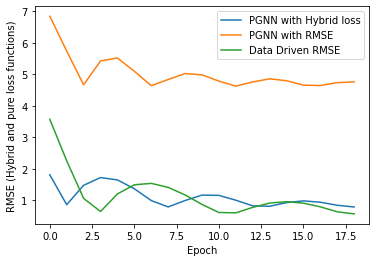

In [20]:
plt.plot(res_loss_pgnn['output_2_loss'][1:], label='PGNN with Hybrid loss')
plt.plot(res_pure_pgnn['loss'][1:], label='PGNN with RMSE')
plt.plot(res_dd['loss'][1:], label='Data Driven RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE (Hybrid and pure loss functions)')
plt.legend()
plt.show()